In [1]:
"""
Python numpy code for Latent Semantic Analysis
on a synthetic dataset.
(LSA). 
"""
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_examples = 500

torch.manual_seed(42)

# We create a random feature vector
x0 = torch.normal(0, 100, (num_examples,)).round()

# Then we create another feature vector which is
# highly correlated with the previous feature:
# x1 = 2 * x0.
# We add random noise to this second feature.
# Thus x0 and x1 are highly correlated.
random_noise = torch.normal(0, 2, (num_examples,)).round()

x1 = 2*x0 + random_noise

# x2 is a random vector with all values close to 0
x2 = torch.normal(0, 5, (num_examples,)).round()

# Create a 3D dataset X = [x0 x1 x2]
X = torch.column_stack((x0, x1, x2))

# Perform SVD
U, S, V_t = torch.linalg.svd(X)
V = V_t.T

# Note: the third singular value is very low
#       relative to the first.
print("Singular values are:\n{}, {}, {}".\
      format(S[0], S[1], S[2]))

# Assert that the row vectors of V are orthogonal
assert torch.allclose(torch.matmul(V.T, V), torch.eye(3), atol=1e-6)

# Assert that the column vectors are orthonormal
assert torch.allclose(torch.linalg.norm(V, axis=0),
                   torch.ones(3))

Singular values are:
4867.56982421875, 118.05858612060547, 19.686044692993164


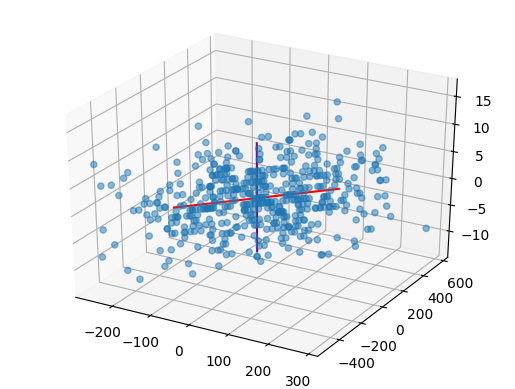

In [3]:
#3D plotting of the points and principal components
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
             alpha = 0.5)
mean = torch.mean(X, axis=0)

pc0 = V[:, 0].numpy()
pc1 = V[:, 1].numpy()

#plot the first principal component
pc0_line = np.array([t * pc0
                     for t in np.linspace(-300,
                                          300, 20)])
ax.plot(pc0_line[:,0], pc0_line[:, 1],
        pc0_line[:, 2], c= 'red')

#plot the second principal component
pc1_line = np.array([t * pc1
                     for t in np.linspace(-10,
                                          10, 10)])
ax.plot(pc1_line[:,0], pc1_line[:, 1],
        pc1_line[:, 2], c= 'purple')

plt.show()